In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
import warnings
warnings.filterwarnings("ignore")

import os
from os.path import join

import pandas as pd
import numpy as np

import missingno as msno

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb
import lightgbm as lgb

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#Í∏∞Î≥∏ Í≤ΩÎ°ú ÏßÄÏ†ïÌïòÍ∏∞
BASE_DIR = os.getcwd()
print(BASE_DIR)

#\ÎèàÎ≤ÑÌäº ÏïÑÎûò
data_dir = BASE_DIR
data_dir += '\data'

train_data_path = join(data_dir, 'train.csv')
sub_data_path = join(data_dir, 'test.csv')      # ÌÖåÏä§Ìä∏, Ï¶â submission Ïãú ÏÇ¨Ïö©Ìï† Îç∞Ïù¥ÌÑ∞ Í≤ΩÎ°ú

print(train_data_path)
print(sub_data_path)

c:\Project\Python3
c:\Project\Python3\data\train.csv
c:\Project\Python3\data\test.csv


In [8]:
data = pd.read_csv(train_data_path)
sub = pd.read_csv(sub_data_path)
print('train data dim : {}'.format(data.shape))
print('sub data dim : {}'.format(sub.shape))

train data dim : (15035, 21)
sub data dim : (6555, 20)


In [9]:
#Îç∞Ïù¥ÌÑ∞ÏóêÏÑú ÌîÑÎùºÏù¥Ïä§ Ïù∏Îç±Ïä§Í∞íÏùÑ Î™®Îëê YÏóê Ï†ÄÏû•ÌïòÍ≥† ÍπäÏùÄÎ≥µÏÇ¨ Îç∞Ïù¥ÌÑ∞ ÏïàÏóêÏÑú Í∞ÄÍ≤©ÏùÄ ÏóÜÏï†Î≤ÑÎ¶º.
y = data['price']
del data['price']

#Ïù∏Îç±Ïä§ Îã§ ÎΩëÏùÑÏàòÏûàÎäî Í∏∞Îä•. Ïª¨Îüº=Ïó¥ Ïó¥Ïóê ID Î°úÏö∞Ïóê Îç∞Ïù¥ÌÑ∞ Î°úÏö∞=Ìñâ
print(data.columns)
#Îç∞Ïù¥ÌÑ∞ ÏïàÏóêÏÑú 3Î≤àÏ®∞ Í∞ÄÍ≤© Ïù∏Îç±Ïä§Í∞Ä ÏÇ¨ÎùºÏßÑÍ≤ÉÏùÑ ÌôïÏù∏Ìï®.

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
#ÌÖåÏä§Ìä∏ÏÖãÍ≥º Ìï©Ï≥êÏÑú Ï†ÑÏ≤¥ Îç∞Ïù¥ÌÑ∞Î≥¥Í∏∞ ÎÇòÏ§ëÏóê Î∂ÑÎ¶¨Ìï¥Ïïº„ÖëÌï¥ÏÑú ÌÖåÏä§Ìä∏ÏÖã Í∏∏Ïù¥Îäî Ï†ÄÏû•Ìï¥ÎÜìÏùå
train_len = len(data)
data = pd.concat((data, sub), axis=0)

print(len(data))

21590


<AxesSubplot:>

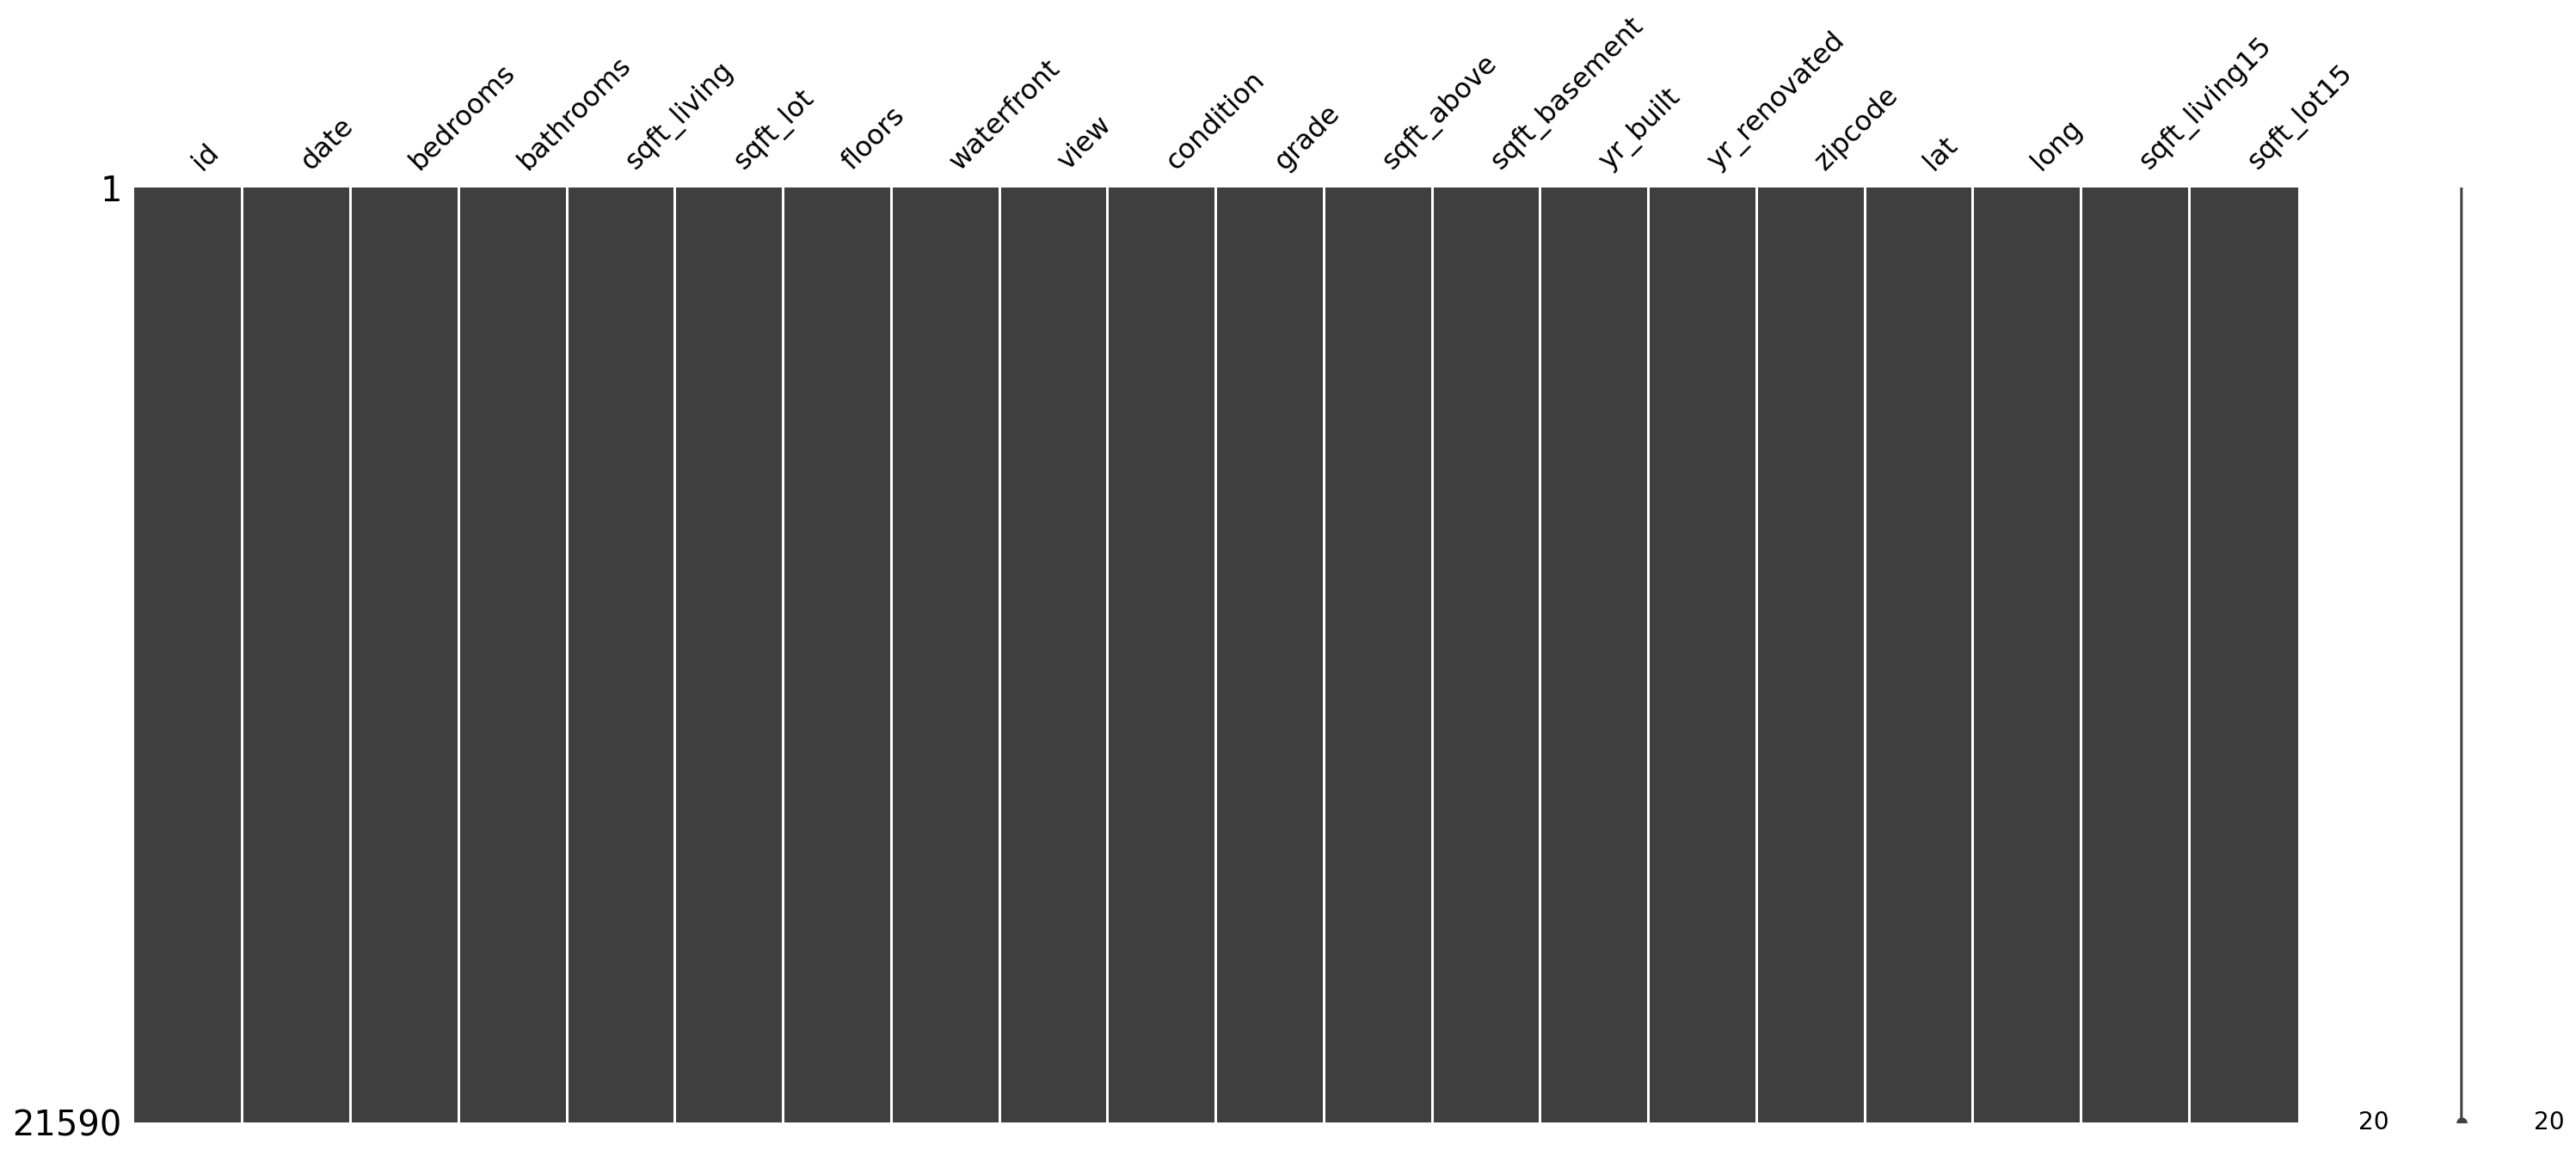

In [11]:
#Í≤∞Ï∏°ÏπòÍ∞Ä ÏóÜÏúºÎ©¥ Ï†ÑÏ≤¥Í∞Ä ÍπåÎß£Í≤å ÎÇòÏò§ÎäîÍ≤É.ÎØ∏Ïã±ÎÖ∏
msno.matrix(data)

In [12]:
# 1. id Ïª¨ÎüºÏù¥ Í≤∞Ï∏°ÏπòÏù∏ÏßÄ ÌôïÏù∏Ìï©ÎãàÎã§.
null_check = pd.isnull(data['id'])
#print(null_check)

#Í≤∞Í≥º ÏóÜÏùå.
null_data = data.loc[null_check, 'id']
null_data.head()

#Í≤∞Ï∏°Ïπò Í∞úÏàò ÌôïÏù∏.
null_data = data.loc[null_check, 'id']
null_data.head()
print('{} : {}'.format('id', len(data.loc[pd.isnull(data['id']), 'id'].values)))

#Î™®Îì† ÏπºÎüºÏóê Í≤∞Ï∏°Ïπò ÌôïÏù∏
for c in data.columns:
    print('{} : {}'.format(c, len(data.loc[pd.isnull(data[c]), c].values)))

#Ïä¨ÎùºÏù¥Ïã±ÏúºÎ°ú Ìä∏Î†àÏù∏Îç∞Ïù¥ÌÑ∞Î∂ÄÌÑ∞ sub idÏóê Ï†ÄÏû•.
sub_id = data['id'][train_len:]
del data['id']

print(data.columns)

id : 0
id : 0
date : 0
bedrooms : 0
bathrooms : 0
sqft_living : 0
sqft_lot : 0
floors : 0
waterfront : 0
view : 0
condition : 0
grade : 0
sqft_above : 0
sqft_basement : 0
yr_built : 0
yr_renovated : 0
zipcode : 0
lat : 0
long : 0
sqft_living15 : 0
sqft_lot15 : 0
Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [13]:
#ÎÇ†Ïßú Ìé∏ÏßëÌïòÍ∏∞.  xÎ•º Î∞∞Ïó¥Î°ú ÏïûÏóê 6Í∞úÎßå ÎÇ®Í∏∞Í≥† ÏßúÎ•¥Í∏∞. ÎÑòÌååÏù¥ Ïñ¥ÌîåÎùºÏù¥.
data['date'] = data['date'].apply(lambda x : str(x[:6]))

data.head()

date  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  \
0  201410         3       1.00         1180      5650     1.0           0   
1  201502         2       1.00          770     10000     1.0           0   
2  201502         3       2.00         1680      8080     1.0           0   
3  201406         3       2.25         1715      6819     2.0           0   
4  201501         3       1.50         1060      9711     1.0           0   

   view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0     0          3      7        1180              0      1955             0   
1     0          3      6         770              0      1933             0   
2     0          3      8        1680              0      1987             0   
3     0          3      7        1715              0      1995             0   
4     0          3      7        1060              0      1963             0   

   zipcode      lat     long  sqft_living15  sqft_lot15  
0    98178  47.5112 -122.257           1340        5650  
1    98028  47.7379 -122.233           2720        8062  
2    98074  47.6168 -122.045           1800        7503  
3    98003  47.3097 -122.327           2238        6819  
4    98198  47.4095 -122.315           1650        9711

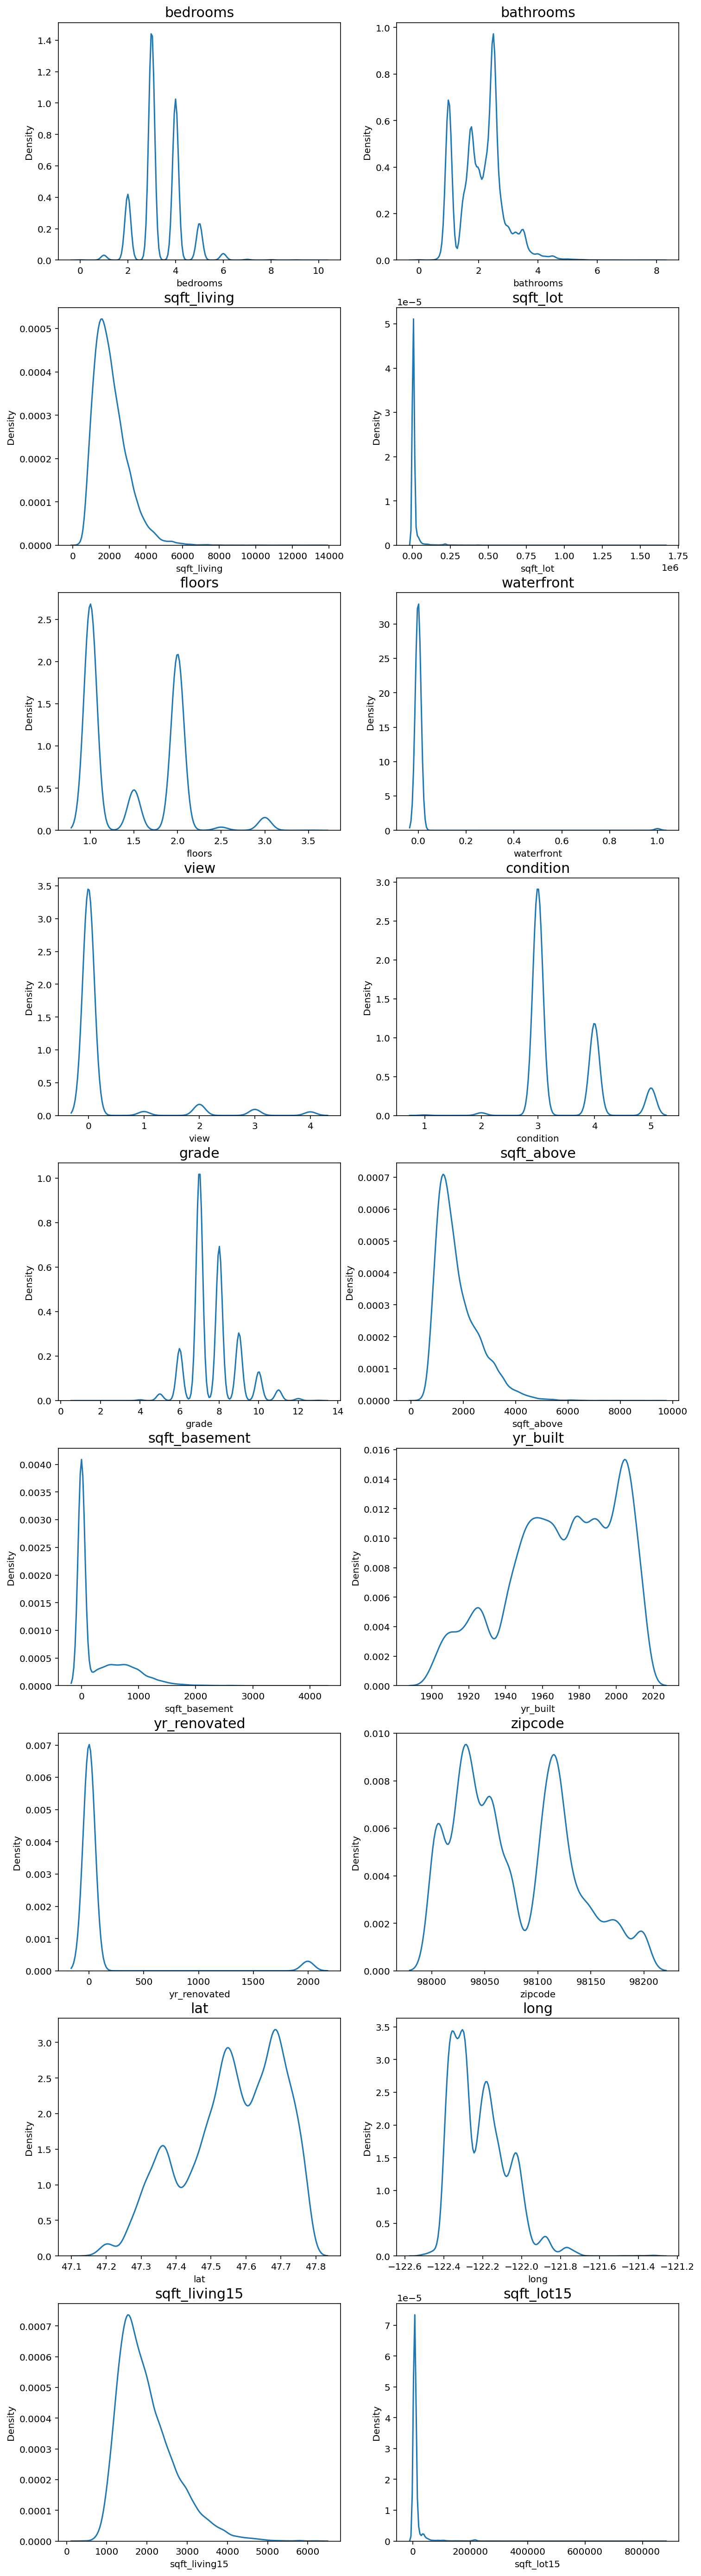

In [14]:

trow = 9
tcol =2 
fig, ax = plt.subplots(trow, tcol, figsize=(12, 50))   # Í∞ÄÎ°úÏä§ÌÅ¨Î°§ ÎïåÎ¨∏Ïóê Í∑∏ÎûòÌîÑ ÌôïÏù∏Ïù¥ Î∂àÌé∏ÌïòÎã§Î©¥ figsizeÏùò xÍ∞íÏùÑ Ï°∞Ï†àÌï¥ Î≥¥ÏÑ∏Ïöî. 

# id Î≥ÄÏàò(count==0Ïù∏ Í≤ΩÏö∞)Îäî Ï†úÏô∏ÌïòÍ≥† Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï©ÎãàÎã§.
count = 1
columns = data.columns
for row in range(trow):
    for col in range(tcol):

    
        sns.kdeplot(data = data[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
        if count == 19 :
            break



In [15]:
#ÏπòÏö∞ÏπúÏΩîÎìú ÌèâÌÉÑÌôî ÌïòÍ∏∞.
skew_columns = ['bedrooms', 'sqft_living', 'sqft_lot', 'sqft_above', 'sqft_basement', 'sqft_lot15', 'sqft_living15']

for c in skew_columns:
    data[c] = np.log1p(data[c].values)

In [16]:
'''

fig, ax = plt.subplots(4, 2, figsize=(12, 24))

count = 0
for row in range(4):
    for col in range(2):
        if count == 7:
            break
        sns.kdeplot(data = data[skew_columns[count]], ax=ax[row][col])
        ax[row][col].set_title(skew_columns[count], fontsize=15)
        count += 1
        
        
        
'''

'\n\nfig, ax = plt.subplots(4, 2, figsize=(12, 24))\n\ncount = 0\nfor row in range(4):\n    for col in range(2):\n        if count == 7:\n            break\n        sns.kdeplot(data = data[skew_columns[count]], ax=ax[row][col])\n        ax[row][col].set_title(skew_columns[count], fontsize=15)\n        count += 1\n        \n        \n        \n'

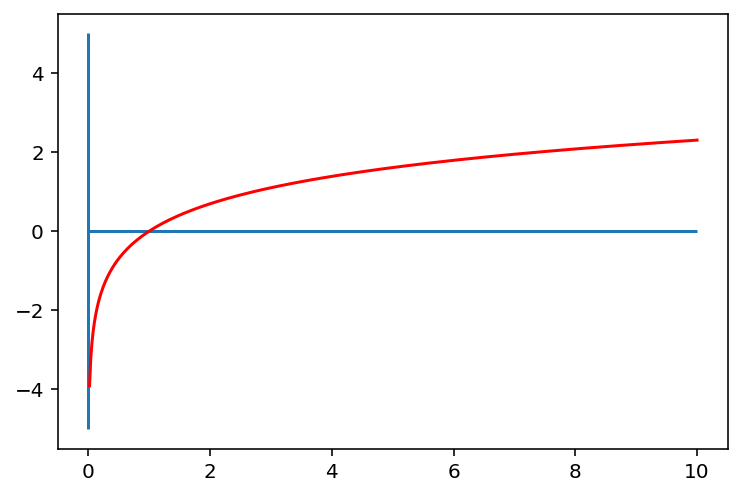

In [17]:
xx = np.linspace(0, 10, 500)
yy = np.log(xx)

plt.hlines(0, 0, 10)
plt.vlines(0, -5, 5)
plt.plot(xx, yy, c='r')
plt.show()

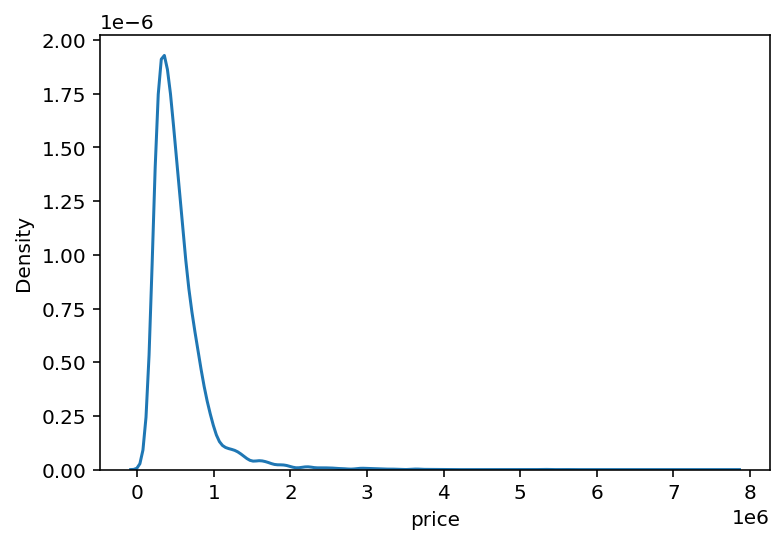

In [18]:
sns.kdeplot(y)
plt.show()

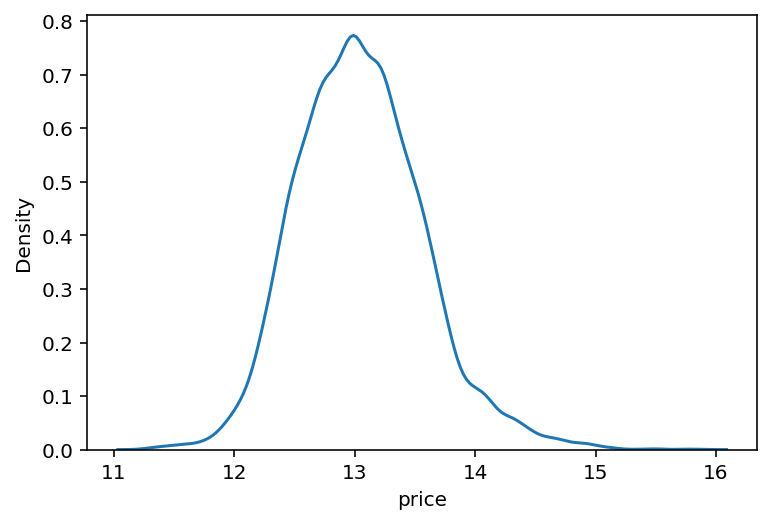

In [19]:
y_log_transformation = np.log1p(y)

sns.kdeplot(y_log_transformation)
plt.show()

In [20]:
sub = data.iloc[train_len:, :]
x = data.iloc[:train_len, :]

print(x.shape)
print(sub.shape)

(15035, 19)
(6555, 19)


In [22]:
gboost = GradientBoostingRegressor(random_state=2019)
xgboost = xgb.XGBRegressor(random_state=2019)
lightgbm = lgb.LGBMRegressor(random_state=2019)

models = [{'model':gboost, 'name':'GradientBoosting'}, {'model':xgboost, 'name':'XGBoost'},
          {'model':lightgbm, 'name':'LightGBM'}]
#Î™®Îç∏ 5Í∞ÄÏßÄ ÎßåÎì§Í∏∞

In [29]:
#ÍµêÏ∞®Í≤ÄÏ¶ù ÏïåÍ≥†Î¶¨Ï¶ò
def get_cv_score(models):
    kfold = KFold(n_splits=5, random_state=2019, shuffle = True).get_n_splits(x.values)
    for m in models:
        CV_score = np.mean(cross_val_score(m['model'], X=x.values, y=y, cv=kfold))
        print(f"Model: {m['name']}, CV score:{CV_score:.4f}")

In [30]:
get_cv_score(models)

Model: GradientBoosting, CV score:0.8598
Model: XGBoost, CV score:0.8860
Model: LightGBM, CV score:0.8819


In [32]:
# Í∞Å Î™®Îç∏Ïóê ÎåÄÌïú ÏòàÏ∏° Í≤∞Í≥ºÎ•º ÌèâÍ∑† ÎÇ¥Ïñ¥ Ï£ºÎäî AveragingBlending() Ìï®Ïàò

def AveragingBlending(models, x, y, sub_x):
    for m in models : 
        m['model'].fit(x.values, y)
    
    predictions = np.column_stack([
        m['model'].predict(sub_x.values) for m in models
    ])
    return np.mean(predictions, axis=1)


In [33]:
#ÏòàÏ∏°Í∞í ÏÉùÏÑ±

y_pred = AveragingBlending(models, x, y, sub)
print(len(y_pred))
y_pred

6555


array([1361676.91242777,  308900.55888961,  786583.53874638, ...,
       1693771.62246729,  415635.76190782,  341572.97685942])

In [35]:
data_dir

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)
submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [36]:
result = pd.DataFrame({'id': sub_id, 'price': y_pred})

result.head()


id         price
0  15208  1.361677e+06
1  15209  3.089006e+05
2  15210  7.865835e+05
3  15211  2.143299e+05
4  15212  4.413795e+05

In [37]:

# #ÏÉòÌîå Í≤∞Í≥º Ï†ÄÏû•ÌïòÍ∏∞.
# my_submission_path = join(data_dir, 'submission.csv')
# result.to_csv(my_submission_path, index=False)

# print(my_submission_path)


c:\Project\Python3\data\submission.csv


In [4]:
# data_dir = os.getenv('HOME')+'/aiffel/kaggle_kakr_housing/data'

#Í∏∞Î≥∏ Í≤ΩÎ°ú ÏßÄÏ†ïÌïòÍ∏∞
BASE_DIR = os.getcwd()
print(BASE_DIR)

#\ÎèàÎ≤ÑÌäº ÏïÑÎûò
data_dir = BASE_DIR
data_dir += '\data'


train_data_path = join(data_dir, 'train.csv')
test_data_path = join(data_dir, 'test.csv') 

train = pd.read_csv(train_data_path)
test = pd.read_csv(test_data_path)

print('Ïñçüí¢')

c:\Project\Python3
Ïñçüí¢


In [5]:
train.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   0  20141013T000000  221900.0         3       1.00         1180      5650   
1   1  20150225T000000  180000.0         2       1.00          770     10000   
2   2  20150218T000000  510000.0         3       2.00         1680      8080   
3   3  20140627T000000  257500.0         3       2.25         1715      6819   
4   4  20150115T000000  291850.0         3       1.50         1060      9711   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     1.0           0     0  ...      6         770              0      1933   
2     1.0           0     0  ...      8        1680              0      1987   
3     2.0           0     0  ...      7        1715              0      1995   
4     1.0           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [6]:
train['date'] = train['date'].apply(lambda i: i[:6]).astype(int)
train.head()

id    date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0   0  201410  221900.0         3       1.00         1180      5650     1.0   
1   1  201502  180000.0         2       1.00          770     10000     1.0   
2   2  201502  510000.0         3       2.00         1680      8080     1.0   
3   3  201406  257500.0         3       2.25         1715      6819     2.0   
4   4  201501  291850.0         3       1.50         1060      9711     1.0   

   waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0           0     0  ...      7        1180              0      1955   
1           0     0  ...      6         770              0      1933   
2           0     0  ...      8        1680              0      1987   
3           0     0  ...      7        1715              0      1995   
4           0     0  ...      7        1060              0      1963   

   yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  
0             0    98178  47.5112 -122.257           1340        5650  
1             0    98028  47.7379 -122.233           2720        8062  
2             0    98074  47.6168 -122.045           1800        7503  
3             0    98003  47.3097 -122.327           2238        6819  
4             0    98198  47.4095 -122.315           1650        9711  

[5 rows x 21 columns]

In [7]:
y = train['price']
del train['price']

print(train.columns)

Index(['id', 'date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [8]:
del train['id']

print(train.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [9]:


del test['id']

print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [10]:
test['date'] = test['date'].apply(lambda i: i[:6]).astype(int)


print(test.columns)

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [11]:
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

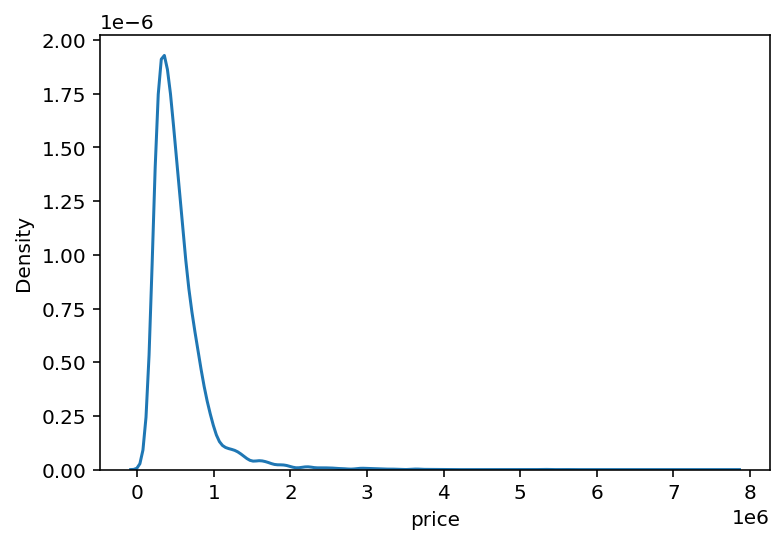

In [12]:
"""
seabornÏùò `kdeplot`ÏùÑ ÌôúÏö©Ìï¥ `y`Ïùò Î∂ÑÌè¨Î•º ÌôïÏù∏Ìï¥Ï£ºÏÑ∏Ïöî!
"""
sns.kdeplot(y)
plt.show()

In [13]:
y = np.log1p(y)
y

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           15035 non-null  int32  
 1   bedrooms       15035 non-null  int64  
 2   bathrooms      15035 non-null  float64
 3   sqft_living    15035 non-null  int64  
 4   sqft_lot       15035 non-null  int64  
 5   floors         15035 non-null  float64
 6   waterfront     15035 non-null  int64  
 7   view           15035 non-null  int64  
 8   condition      15035 non-null  int64  
 9   grade          15035 non-null  int64  
 10  sqft_above     15035 non-null  int64  
 11  sqft_basement  15035 non-null  int64  
 12  yr_built       15035 non-null  int64  
 13  yr_renovated   15035 non-null  int64  
 14  zipcode        15035 non-null  int64  
 15  lat            15035 non-null  float64
 16  long           15035 non-null  float64
 17  sqft_living15  15035 non-null  int64  
 18  sqft_l

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

print('Ïñçüí¢')

Ïñçüí¢


In [15]:
def rmse(y_test, y_pred):
    return np.sqrt(mean_squared_error(np.expm1(y_test), np.expm1(y_pred)))

print('Ïñçüí¢')

Ïñçüí¢


In [16]:
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

print('Ïñçüí¢')

Ïñçüí¢


In [17]:
# random_stateÎäî Î™®Îç∏Ï¥àÍ∏∞ÌôîÎÇò Îç∞Ïù¥ÌÑ∞ÏÖã Íµ¨ÏÑ±Ïóê ÏÇ¨Ïö©ÎêòÎäî ÎûúÎç§ ÏãúÎìúÍ∞íÏûÖÎãàÎã§. 
#random_state=None    # Ïù¥Í≤å Ï¥àÍ∏∞Í∞íÏûÖÎãàÎã§. ÏïÑÎ¨¥Í≤ÉÎèÑ ÏßÄÏ†ïÌïòÏßÄ ÏïäÍ≥† NoneÏùÑ ÎÑòÍ≤®Ï£ºÎ©¥ Î™®Îç∏ ÎÇ¥Î∂ÄÏóêÏÑú ÏûÑÏùòÎ°ú ÏÑ†ÌÉùÌï©ÎãàÎã§.  
random_state=2020        # ÌïòÏßÄÎßå Ïö∞Î¶¨Îäî Ïù¥Î†áÍ≤å Í≥†Ï†ïÍ∞íÏùÑ ÏÑ∏ÌåÖÌï¥ ÎëêÍ≤†ÏäµÎãàÎã§. 

gboost = GradientBoostingRegressor(random_state=random_state)
xgboost = XGBRegressor(random_state=random_state)
lightgbm = LGBMRegressor(random_state=random_state)
rdforest = RandomForestRegressor(random_state=random_state)

models = [gboost, xgboost, lightgbm, rdforest]

print('Ïñçüí¢')

Ïñçüí¢


In [18]:
gboost.__class__.__name__

'GradientBoostingRegressor'

In [19]:
df = {}

for model in models:
    # Î™®Îç∏ Ïù¥Î¶Ñ ÌöçÎìù
    model_name = model.__class__.__name__

    # train, test Îç∞Ïù¥ÌÑ∞ÏÖã Î∂ÑÎ¶¨ - Ïó¨Í∏∞ÏóêÎèÑ random_stateÎ•º Í≥†Ï†ïÌï©ÎãàÎã§. 
    X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)

    # Î™®Îç∏ ÌïôÏäµ
    model.fit(X_train, y_train)
    
    # ÏòàÏ∏°
    y_pred = model.predict(X_test)

    # ÏòàÏ∏° Í≤∞Í≥ºÏùò rmseÍ∞í Ï†ÄÏû•
    df[model_name] = rmse(y_test, y_pred)
    
    # data frameÏóê Ï†ÄÏû•
    score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
    
df

{'GradientBoostingRegressor': 128360.19649691365,
 'XGBRegressor': 110318.6704088949,
 'LGBMRegressor': 111920.36735892233,
 'RandomForestRegressor': 125367.2973747959}

In [20]:
def get_scores(models, train, y):
    df = {}
    
    for model in models:
        model_name = model.__class__.__name__
        
        X_train, X_test, y_train, y_test = train_test_split(train, y, random_state=random_state, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        df[model_name] = rmse(y_test, y_pred)
        score_df = pd.DataFrame(df, index=['RMSE']).T.sort_values('RMSE', ascending=False)
            
    return score_df

In [21]:
from sklearn.model_selection import GridSearchCV

print('Ïñçüí¢')

Ïñçüí¢


In [22]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

In [23]:
model = LGBMRegressor(random_state=random_state)

print('Ïñçüí¢')

Ïñçüí¢


In [24]:
grid_model = GridSearchCV(model, param_grid=param_grid, \
                        scoring='neg_mean_squared_error', \
                        cv=5, verbose=1, n_jobs=5)

grid_model.fit(train, y)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, estimator=LGBMRegressor(random_state=2020), n_jobs=5,
             param_grid={'max_depth': [1, 10], 'n_estimators': [50, 100]},
             scoring='neg_mean_squared_error', verbose=1)

In [25]:
grid_model.cv_results_

{'mean_fit_time': array([0.02920589, 0.04340963, 0.08261857, 0.13363018]),
 'std_fit_time': array([0.00147031, 0.00215441, 0.00080018, 0.00174388]),
 'mean_score_time': array([0.00380101, 0.004601  , 0.0064013 , 0.01020193]),
 'std_score_time': array([0.00040026, 0.00048998, 0.00049027, 0.00097996]),
 'param_max_depth': masked_array(data=[1, 1, 10, 10],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[50, 100, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_depth': 1, 'n_estimators': 50},
  {'max_depth': 1, 'n_estimators': 100},
  {'max_depth': 10, 'n_estimators': 50},
  {'max_depth': 10, 'n_estimators': 100}],
 'split0_test_score': array([-0.0756974 , -0.05555652, -0.02885847, -0.02665428]),
 'split1_test_score': array([-0.07666447, -0.057876  , -0.03041465, -0.02795896]),
 'split2_test_score': array([-0.07354904

In [26]:
params = grid_model.cv_results_['params']
params

[{'max_depth': 1, 'n_estimators': 50},
 {'max_depth': 1, 'n_estimators': 100},
 {'max_depth': 10, 'n_estimators': 50},
 {'max_depth': 10, 'n_estimators': 100}]

In [27]:
score = grid_model.cv_results_['mean_test_score']
score

array([-0.07339447, -0.05502043, -0.02917734, -0.02702714])

In [28]:
results = pd.DataFrame(params)
results['score'] = score

results

max_depth  n_estimators     score
0          1            50 -0.073394
1          1           100 -0.055020
2         10            50 -0.029177
3         10           100 -0.027027

In [29]:
results['RMSE'] = np.sqrt(-1 * results['score'])
results

max_depth  n_estimators     score      RMSE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [30]:

results = results.rename(columns={'RMSE': 'RMSLE'})
results

max_depth  n_estimators     score     RMSLE
0          1            50 -0.073394  0.270914
1          1           100 -0.055020  0.234564
2         10            50 -0.029177  0.170814
3         10           100 -0.027027  0.164399

In [31]:
results = results.sort_values('RMSLE')
results

max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [32]:
def my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5):
    # GridSearchCV Î™®Îç∏Î°ú Ï¥àÍ∏∞Ìôî
    grid_model = GridSearchCV(model, param_grid=param_grid, scoring='neg_mean_squared_error', \
                              cv=5, verbose=verbose, n_jobs=n_jobs)
    
    # Î™®Îç∏ fitting
    grid_model.fit(train, y)

    # Í≤∞Í≥ºÍ∞í Ï†ÄÏû•
    params = grid_model.cv_results_['params']
    score = grid_model.cv_results_['mean_test_score']
    
    # Îç∞Ïù¥ÌÑ∞ ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
    results = pd.DataFrame(params)
    results['score'] = score
    
    # RMSLE Í∞í Í≥ÑÏÇ∞ ÌõÑ Ï†ïÎ†¨
    results['RMSLE'] = np.sqrt(-1 * results['score'])
    results = results.sort_values('RMSLE')

    return results

In [33]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [1, 10],
}

model = LGBMRegressor(random_state=random_state)
my_GridSearch(model, train, y, param_grid, verbose=2, n_jobs=5)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


max_depth  n_estimators     score     RMSLE
3         10           100 -0.027027  0.164399
2         10            50 -0.029177  0.170814
1          1           100 -0.055020  0.234564
0          1            50 -0.073394  0.270914

In [34]:
model = LGBMRegressor(max_depth=10, n_estimators=100, random_state=random_state)
model.fit(train, y)
prediction = model.predict(test)
prediction

array([14.11202067, 12.71849347, 13.52092457, ..., 14.42214958,
       12.9088143 , 12.69894979])

In [35]:
prediction = np.expm1(prediction)
prediction

array([1345155.15609376,  333864.49141891,  744838.89652063, ...,
       1834255.12502788,  403855.25797189,  327402.87855805])

In [37]:
data_dir

submission_path = join(data_dir, 'sample_submission.csv')
submission = pd.read_csv(submission_path)

submission.head()

id   price
0  15035  100000
1  15036  100000
2  15037  100000
3  15038  100000
4  15039  100000

In [41]:
len(prediction)

6555

In [42]:
prediction = prediction[:6468]
submission['price'] = prediction
submission.head()

id         price
0  15035  1.345155e+06
1  15036  3.338645e+05
2  15037  7.448389e+05
3  15038  1.974053e+05
4  15039  4.289361e+05

In [43]:

submission_csv_path = join(data_dir, 'submission2.csv')

submission.to_csv(submission_csv_path, index=False)
print(submission_csv_path)

BASE_DIR = os.getcwd()
data_dir = BASE_DIR
data_dir += '\data'

c:\Project\Python3\data\submission2.csv


In [48]:
def save_submission(model, train, y, test, model_name, rmsle=None):
    model.fit(train, y)
    prediction = model.predict(test)
    prediction = np.expm1(prediction)
    
    BASE_DIR = os.getcwd()
    data_dir = BASE_DIR
    data_dir += '\data'
    submission_path = join(data_dir, 'submission2.csv')
    submission = pd.read_csv(submission_path)
    submission['price'] = prediction
    submission_csv_path = '{}/submission_{}_RMSLE_{}.csv'.format(data_dir, model_name, rmsle)
    submission.to_csv(submission_csv_path, index=False)
    print('{} saved!'.format(submission_csv_path))

In [50]:
#save_submission(model, train, y, test, 'lgbm', rmsle='0.0168')

In [ ]:
#Name               Submitted   Wait time   Execution time  Score
#submission2.csv    just now    1 seconds   0 seconds       500541.49009